In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:
df =pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
print(df.dtypes)
print(df.nunique())

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object
Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64


In [7]:
dtypes = df.dtypes
n_uniq = df.nunique()

pd.DataFrame({"Dtypes": dtypes, "Num_unique": n_uniq}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,int64,int64,object,float64,int64,int64,float64,object,object
Num_unique,2,3,2,88,7,7,248,147,3


In [8]:
def dtye_fun(df):
    dtypes = df.dtypes
    n_uniq = df.nunique()

    return pd.DataFrame({"Dtypes": dtypes, "Num_unique": n_uniq}).T

In [9]:

# from preprocess import dtye_fun,null_fun
# null_fun(df)


In [10]:
cols= ['Survived', 'Pclass', 'Sex',  'SibSp', 'Parch', 'Embarked' ]
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,category,category,category,float64,category,category,float64,object,category


In [11]:
df.shape[0]

891

In [12]:
null= df.isnull().sum()
ratio = (null/ df.shape[0])*100
pd.DataFrame({"Null_Sum": null, "Ratio": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null_Sum,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [13]:
df1 = df.dropna(subset=['Embarked'], inplace = True)

In [14]:
df1 = df.dropna(subset=["Embarked"], inplace= True)
df.head()
df2 = df.drop("Cabin", axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
median = df['Age'].median()
median
df['Age'].fillna(median, inplace = True)

In [16]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [17]:
null= df.isnull().sum()
null

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
#check outliers
num_cols =  df.select_dtypes('number').columns
num_cols

Index(['Age', 'Fare'], dtype='object')

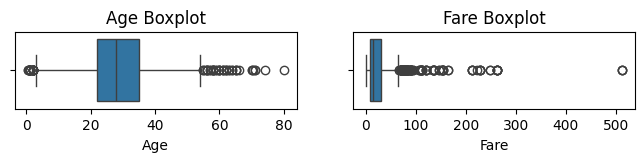

In [19]:
plt.figure(figsize= (8,1))
for i ,col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col], orient='h')
    plt.title(f"{col} Boxplot")

In [20]:
for col  in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3- Q1
    Lower_Fence = Q1 - 1.5*IQR
    Upper_Fence = Q3 + 1.5*IQR
    lower_outliers = df[df[col]   <Lower_Fence][col].values
    Upper_outliers = df[df[col]   >Upper_Fence][col].values
    
    df[col].replace(lower_outliers, Lower_Fence, inplace= True)
    df[col].replace(Upper_outliers, Upper_Fence, inplace= True)
    
    

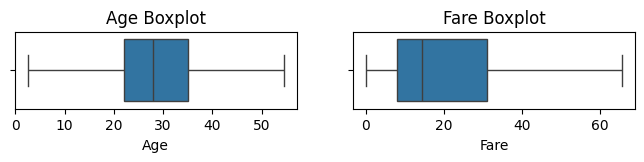

In [21]:
plt.figure(figsize= (8,1))
for i ,col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col], orient='h')
    plt.title(f"{col} Boxplot")

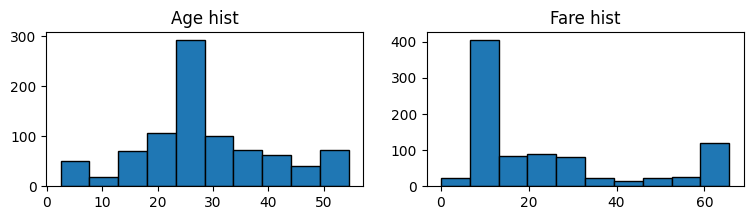

In [22]:
plt.figure(figsize= (9,2))
for i ,col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    plt.hist(df[col], edgecolor='black')
    plt.title(f"{col} hist")

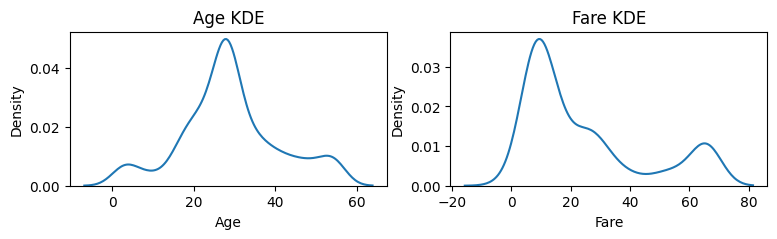

In [23]:
plt.figure(figsize= (9,2))
for i ,col in enumerate(num_cols):
    plt.subplot(1, 2, i+1)
    sns.kdeplot(df[col])
    plt.title(f"{col} KDE")

In [24]:
cat_cols =  df.select_dtypes('category').columns
cat_cols

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

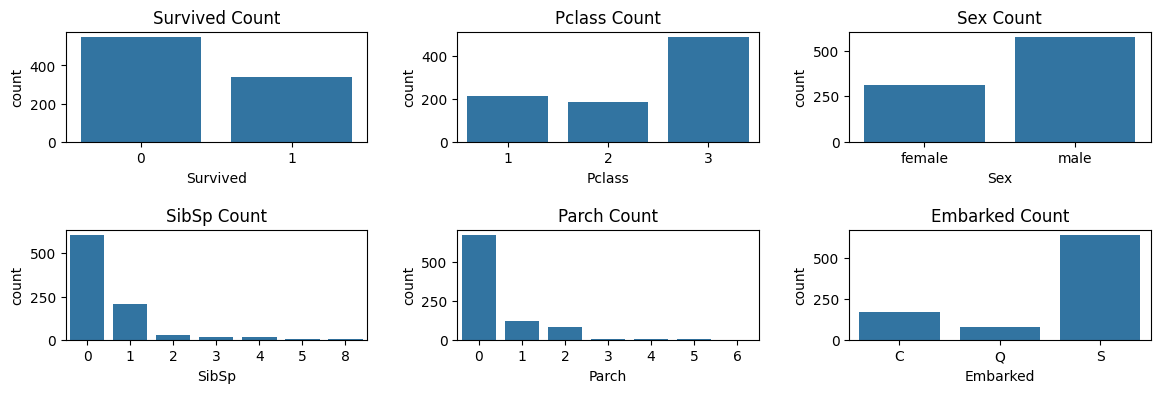

In [25]:
plt.figure(figsize=(14,4))
for i , col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x= col, data = df)
    plt.title(f"{col} Count")
plt.subplots_adjust(hspace= 0.8, wspace=.3)
plt.show()
    

In [26]:
unique = df[col].value_counts()
count = unique.values
print(unique)
print(count)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
[644 168  77]


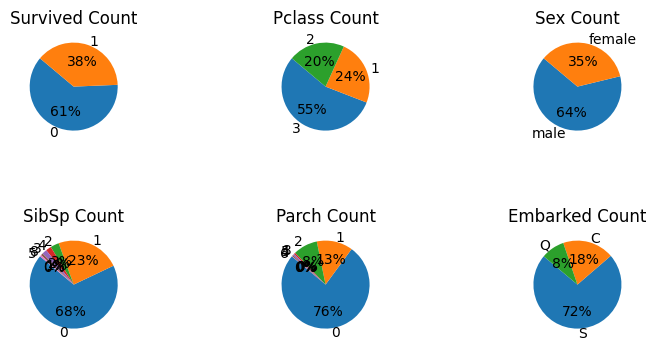

In [27]:
plt.figure(figsize=(9,4))
for i , col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels=categories,startangle =140, autopct = '%1.1d%%')
    plt.title(f"{col} Count")
plt.subplots_adjust(hspace= 0.8, wspace=.3)
plt.show()

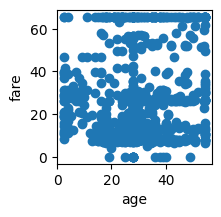

In [28]:
plt.figure(figsize=(2,2))
plt.scatter(df['Age'], df['Fare'])
plt.xlabel("age")
plt.ylabel("fare")
plt.show()

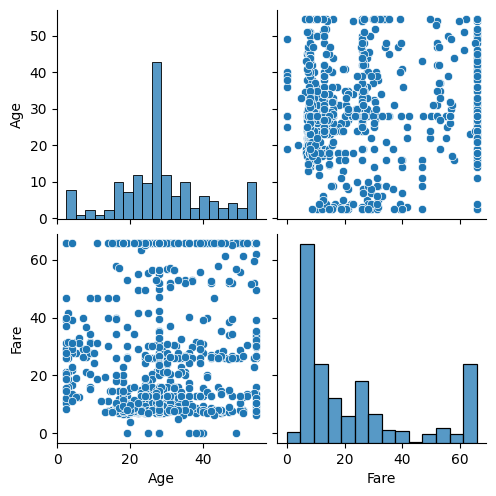

In [29]:
sns.pairplot(df)

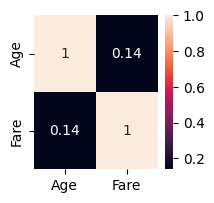

In [30]:
corr = df[['Age', 'Fare']].corr()
plt.figure(figsize=(2, 2))
sns.heatmap(corr, annot=True)
plt.show()

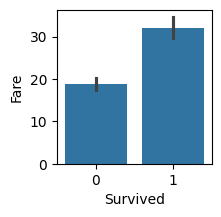

In [31]:
plt.figure(figsize=(2,2))
sns.barplot(x="Survived", y="Fare", data =df)
plt.show()

In [32]:
agg = df.pivot_table(index="Survived", columns="Sex", values ="Age", aggfunc=len)
agg

Sex,female,male
Survived,,
0,81,468
1,231,109


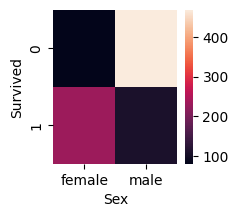

In [33]:
plt.figure(figsize=(2,2))
agg = df.pivot_table(index="Survived", columns="Sex", values ="Age", aggfunc=len)
sns.heatmap(agg)
plt.show()

In [34]:
df.duplicated().sum()

np.int64(129)

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df.duplicated().sum()

np.int64(0)

In [37]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6563,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
# X = df.drop("Survived", axis= 1) 
X = df.iloc[:,1:]

y = df[["Survived"]]


In [39]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,65.6563,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [40]:
y.T

,0,1,2,3,4,5,6,7,8,9,...,879,880,881,882,883,885,887,888,889,890
Survived,0,1,1,1,0,0,0,0,1,1,...,1,1,0,0,0,0,1,0,1,0


In [41]:
import visuals as vs


In [42]:
y = df['Survived']
X = df.drop('Survived', axis=1)
print(X)
print(y)

    Pclass     Sex   Age SibSp Parch     Fare Embarked
0        3    male  22.0     1     0   7.2500        S
1        1  female  38.0     1     0  65.6563        C
2        3  female  26.0     0     0   7.9250        S
3        1  female  35.0     1     0  53.1000        S
4        3    male  35.0     0     0   8.0500        S
..     ...     ...   ...   ...   ...      ...      ...
885      3  female  39.0     0     5  29.1250        Q
887      1  female  19.0     0     0  30.0000        S
888      3  female  28.0     1     2  23.4500        S
889      1    male  26.0     0     0  30.0000        C
890      3    male  32.0     0     0   7.7500        Q

[760 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 760, dtype: category
Categories (2, int64): [0, 1]


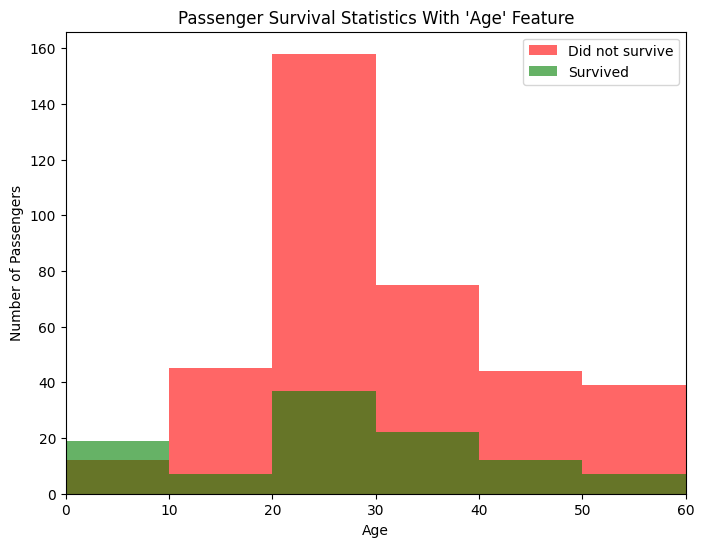

In [43]:
# survival_stats(X, y, 'Sex')
vs.survival_stats(X, y, 'Age', ["Sex == 'male'"])

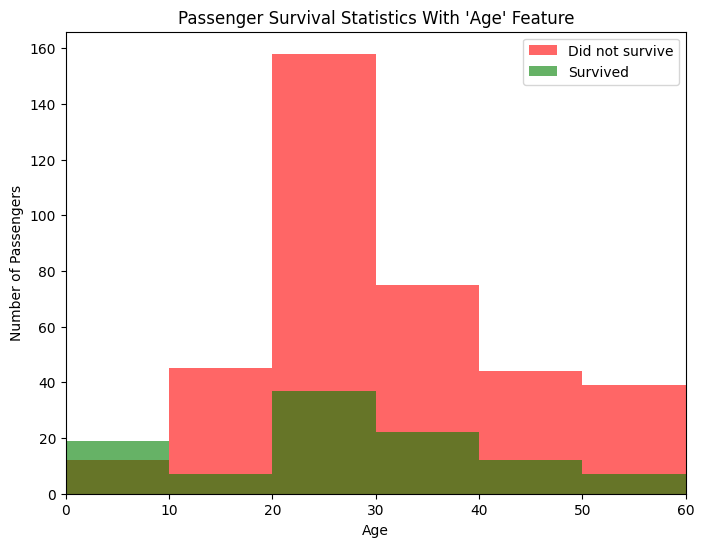

In [44]:
# survival_stats(X, y, 'Age', ["Sex == 'male'"])
vs.survival_stats(X, y, 'Age', ["Sex == 'male'"])


###  Q1 How did survival rates vary by age among male passengers under the age of 70? Are there any noticeable age ranges where survival chances were significantly higher or lower?"

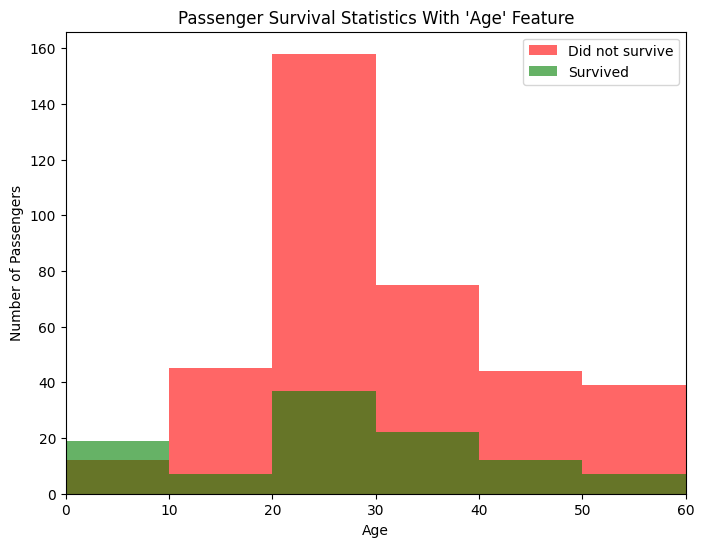

In [45]:
# survival_stats(X, y, 'Age', ["Sex == 'male'", "Age < 70"])
vs.survival_stats(X, y, 'Age', ["Sex == 'male'", "Age < 70"])

Why might applying filters like "Sex == 'female'" and "Age > 30" before analyzing the 'Fare' feature give you more meaningful insights compared to analyzing the entire dataset without filters?

### Write a line of code using the survival_stats() function that analyzes the 'Fare' feature for female passengers who are older than 30.

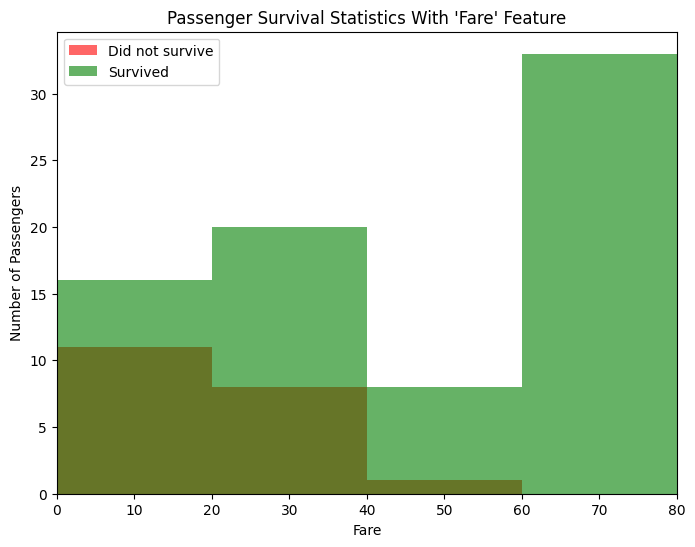

In [46]:

vs.survival_stats(X, y, 'Fare', ["Sex == 'female'", "Age > 30"])


### Q2 Compare the survival rates of males and females within each passenger class (Pclass). Is the survival advantage of females consistent across all classes?"

### Survival Rates by Class and Gender:

**--- Pclass 1 ---**  
- **Female survival rate:** 96.43%  
- **Male survival rate:** 37.72%  

**--- Pclass 2 ---**  
- **Female survival rate:** 91.67%  
- **Male survival rate:** 18.68%  

**--- Pclass 3 ---**  
- **Female survival rate:** 47.24%  
- **Male survival rate:** 16.18%


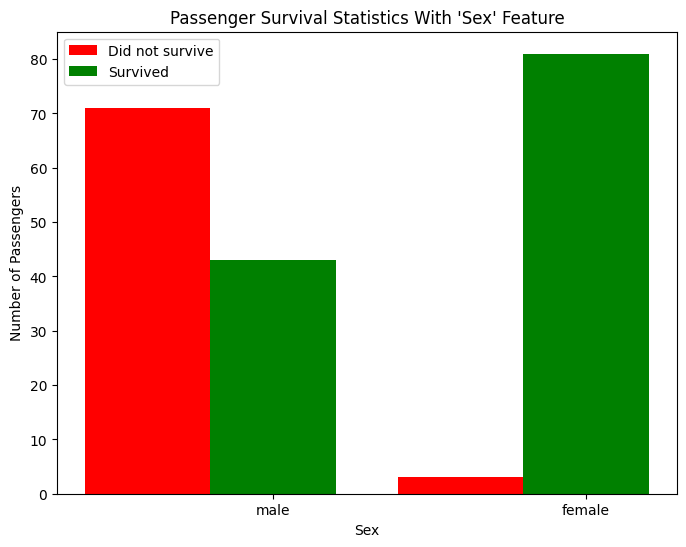

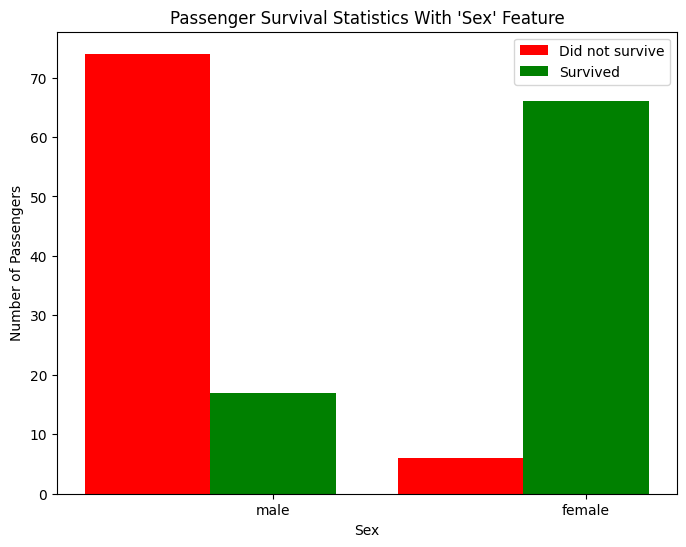

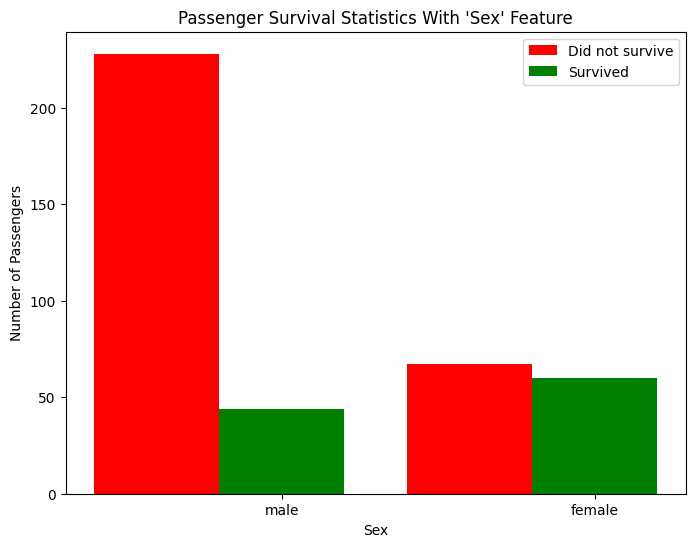

In [47]:
# Pclass 1
vs.survival_stats(X, y, 'Sex', ["Pclass == 1"])

# Pclass 2
vs.survival_stats(X, y, 'Sex', ["Pclass == 2"])

# Pclass 3
vs.survival_stats(X, y, 'Sex', ["Pclass == 3"])

In [48]:
y.T

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 760, dtype: category
Categories (2, int64): [0, 1]

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [50]:
num_cols = X.select_dtypes("number").columns
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])


In [51]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.375000,1,0,0.110424,S
1,1,female,0.682692,1,0,1.000000,C
2,3,female,0.451923,0,0,0.120704,S
3,1,female,0.625000,1,0,0.808757,S
4,3,male,0.625000,0,0,0.122608,S


In [52]:
str_col = ['Sex', 'Embarked']
pd.DataFrame(X[str_col].nunique()).T

,Sex,Embarked
0,2,3


In [53]:
from category_encoders import  OneHotEncoder

In [54]:
encoder = OneHotEncoder(cols = str_col,drop_invariant=True)
X = encoder.fit_transform(X)


In [55]:
X

,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,3,1,0,0.375000,1,0,0.110424,1,0,0
1,1,0,1,0.682692,1,0,1.000000,0,1,0
2,3,0,1,0.451923,0,0,0.120704,1,0,0
3,1,0,1,0.625000,1,0,0.808757,1,0,0
4,3,1,0,0.625000,0,0,0.122608,1,0,0
...,...,...,...,...,...,...,...,...,...,...
885,3,0,1,0.701923,0,5,0.443598,0,0,1
887,1,0,1,0.317308,0,0,0.456925,1,0,0
888,3,0,1,0.490385,1,2,0.357163,1,0,0
889,1,1,0,0.451923,0,0,0.456925,0,1,0
